In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics

In [3]:
# Load dataset
df_train = pd.read_csv("filtered_fever_data.csv")

In [4]:
# Splitting dataset
X = df_train['claim']
y = df_train['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Convert labels to numerical format
label_mapping = {"SUPPORTS": 0, "REFUTES": 1}
y_train = y_train.map(label_mapping)
y_test = y_test.map(label_mapping)

In [6]:
# Text Vectorization 
vectorizer = TfidfVectorizer(stop_words='english', max_features=15)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [7]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [8]:
# Predictions
predictions = model.predict(X_test_tfidf)

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
f1_score =  metrics.f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-measure:", f1_score)

Accuracy: 0.724342045351061
Precision: 0.2
Recall: 0.0009940357852882703
F-measure: 0.001978239366963402


In [10]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.73      1.00      0.84     15926
           1       0.20      0.00      0.00      6036

    accuracy                           0.72     21962
   macro avg       0.46      0.50      0.42     21962
weighted avg       0.58      0.72      0.61     21962



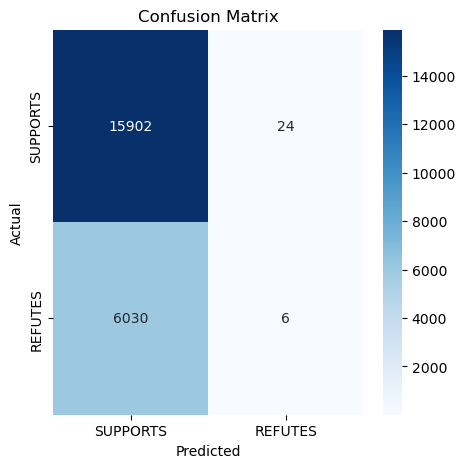

In [11]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()